<a href="https://colab.research.google.com/github/lishav123/MLS-track-notes-/blob/main/Introduction_to_DeepLearning_with_Pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch

torch.tensor([1, 2, 3, 4, 5])

tensor([1, 2, 3, 4, 5])

In [11]:
from sklearn.datasets import load_iris

X = torch.tensor(load_iris().data).float()
y = torch.tensor(load_iris().target).long()

model = torch.nn.Sequential(
    torch.nn.Linear(4, 3),
    torch.nn.ReLU(),
    torch.nn.Linear(3, 4),
    torch.nn.ReLU(),
    torch.nn.Linear(4, 3),
    torch.nn.Softmax(dim=1)
)

optim = torch.optim.Adam(model.parameters())
loss_fn = torch.nn.CrossEntropyLoss()

for epoch in range(1000):
    y_pred = model(X)
    loss = loss_fn(y_pred, y)
    optim.zero_grad()
    loss.backward()
    optim.step()

loss = loss_fn(model(X), y)
print(loss)

tensor(0.6446, grad_fn=<NllLossBackward0>)


In [12]:
from sklearn.metrics import accuracy_score

accuracy_score(y, torch.argmax(model(X), dim=1))

0.98

In [1]:
import torch

tempratures = torch.tensor([[32.2, 33.4, 44.5], [33.2, 44.5, 34.0]])
tempratures

tensor([[32.2000, 33.4000, 44.5000],
        [33.2000, 44.5000, 34.0000]])

In [8]:
from sklearn.datasets import load_digits
from torch.utils.data import TensorDataset

dataset = TensorDataset(torch.tensor(load_digits().data).float(), torch.tensor(load_digits().target).long())
input_sample, label_sample = dataset[4]
input_sample.shape, label_sample

(torch.Size([64]), tensor(4))

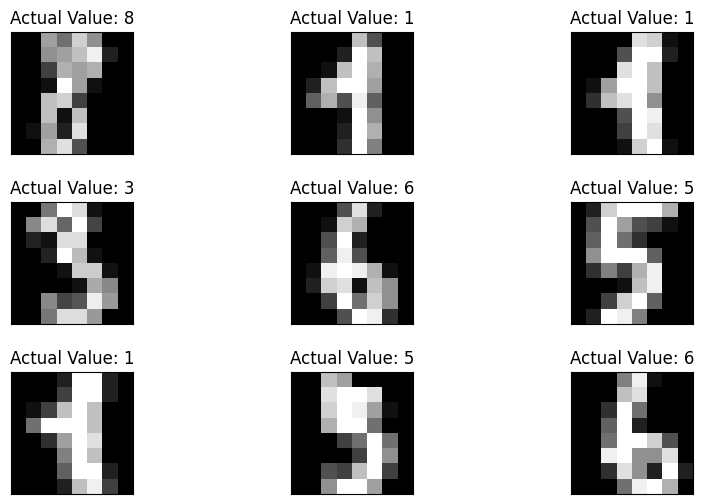

In [16]:
import matplotlib.pyplot as plt
from random import seed, randint

seed(10)
index = [randint(1, 50) for i in range(9)]

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(10, 6))

for i in range(3):
  for j in range(3):
    x = randint(1, 50)
    axes[i][j].imshow(dataset[x][0].reshape(8, 8), cmap='gray')
    axes[i][j].set_title(f"Actual Value: {dataset[x][1]}")
    axes[i][j].tick_params(axis='both', which='both', length=0,
                   labelbottom=False, labelleft=False)
fig.subplots_adjust(hspace=0.4, wspace=0.3)